In [7]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape
test_images.shape

(10000, 28, 28)

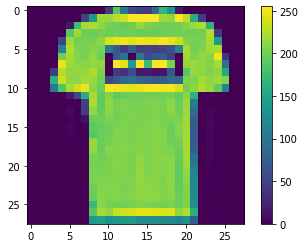

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,tf.keras.layers.Softmax())
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
New_model=model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7050 - accuracy: 0.7636
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6212 - accuracy: 0.8420
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6100 - accuracy: 0.8525
Epoch 4/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6018 - accuracy: 0.8604
Epoch 5/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5939 - accuracy: 0.8683
Epoch 6/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5905 - accuracy: 0.8712
Epoch 7/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5848 - accuracy: 0.8769
Epoch 8/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5820 - accuracy: 0.8801
Epoch 9/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5788 - accuracy: 0.8828
Epoch 10/12
1875/1875 [==============================] - 3s 2ms/step - loss: 1.576

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.5851 - accuracy: 0.8764

Test accuracy: 0.8763999938964844


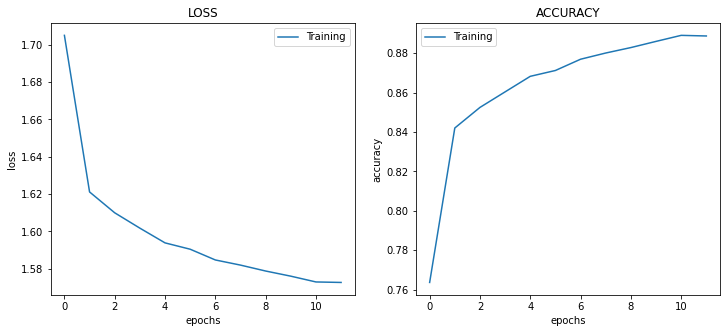

In [17]:
fig, axes = plt.subplots(1, 2)
for ax, label in zip(axes, ['loss', 'accuracy']):
    ax.plot(New_model.history[label], label='Training')
    # ax.plot(New_model.history['val_'+label], label='Validation')
    ax.legend()
    ax.set_xlabel('epochs')
    ax.set_ylabel(label)
    ax.set_title(label.upper())
fig.set_size_inches(12, 5)

In [18]:
model.save('modelN.model')

INFO:tensorflow:Assets written to: modelN.model/assets


INFO:tensorflow:Assets written to: modelN.model/assets


In [19]:
new_model = tf.keras.models.load_model('modelN.model')

In [20]:
predictions = new_model.predict(test_images)

In [21]:
predictions[0]

array([2.6144677e-12, 8.1116524e-18, 8.7598535e-14, 8.4031340e-14,
       4.2535921e-13, 4.4941792e-04, 9.7134147e-14, 1.2301608e-06,
       2.1248956e-11, 9.9954933e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

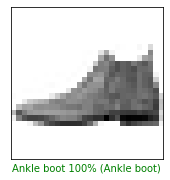

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

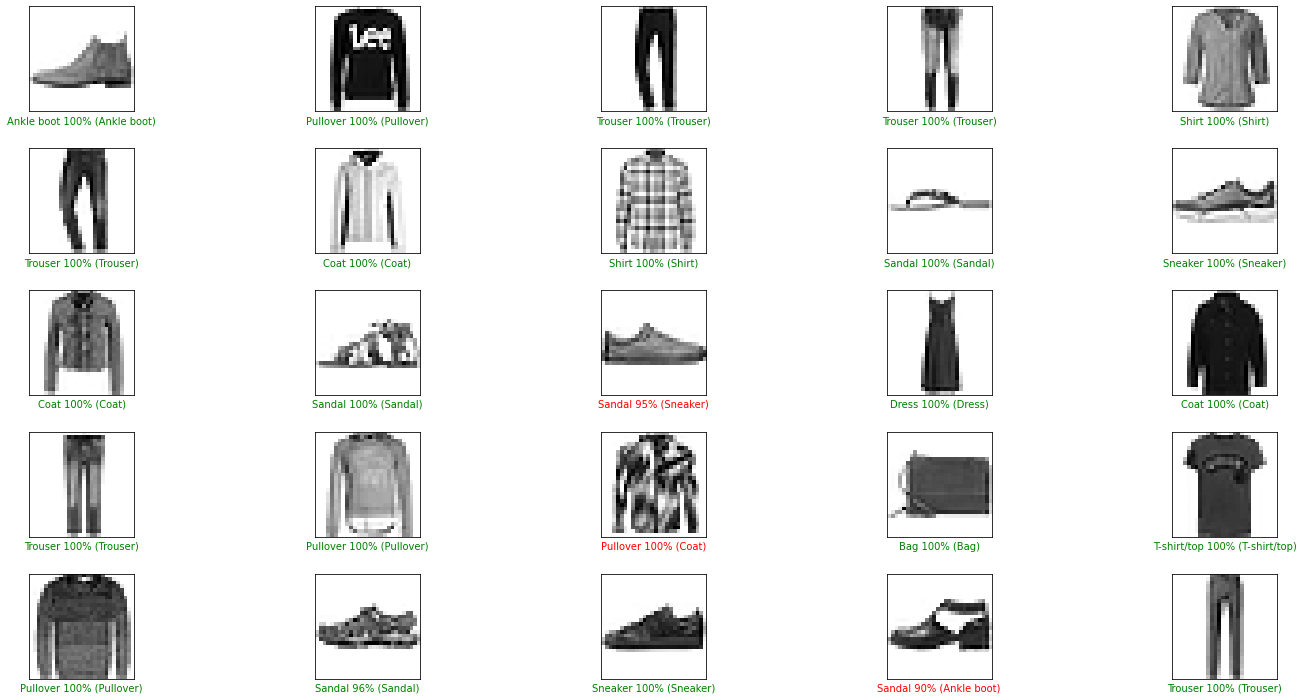

In [28]:
#Plot the first X test images, their predicted labels, and the true labels.
#Color correct predictions in green and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

In [29]:
preds = model.predict_classes(test_images)
expected = [x for x in test_labels]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
results = pd.DataFrame({'preds':preds, 'expected':expected})
results['wrong_ones'] = results['preds'] != results['expected']
results.head()

,preds,expected,wrong_ones
0,9,9,False
1,2,2,False
2,1,1,False
3,1,1,False
4,6,6,False


In [31]:


wrong_results = results[results['wrong_ones']]
wrong_locs = wrong_results.index.values



In [32]:
def compare(locs, size=5):
    show_images(test_images, locs[np.random.randint(0, len(locs), size=size)], test_labels, preds)

In [33]:


def show_images(X, locs, y, preds=None):
    if isinstance(locs, int):
        locs = [locs]
    fig=plt.figure(figsize=(15, 10))
    for i, val in enumerate(locs):
        fig.add_subplot(1, len(locs), i+1)
        plt.imshow(X[val].reshape((28, 28)))
        plt.text(0, 32, "Class: %s" % class_names[np.argmax(y[val])])
        if preds is not None:
            plt.text(0, 35, "Predicted: %s" % class_names[np.argmax(preds[val])])
    plt.tight_layout()
    plt.show()



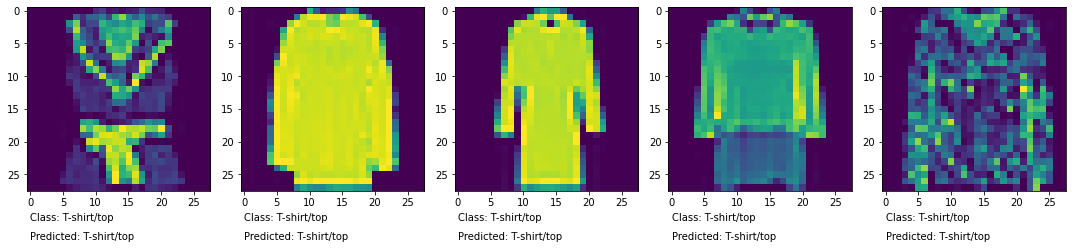

In [34]:
compare(wrong_locs)

